In [77]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import pandas as pd
import numpy as np

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# Make a reference to the mousedata.csv files
csv_path_drug = "data/mouse_drug_data.csv"
csv_path_trial = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
#mouse_drug_data_to_load = "data/mouse_drug_data.csv"
#clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
mouse_drug_df = pd.read_csv(csv_path_drug, encoding="utf-8")
mouse_drug_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [78]:
clinical_trial_df = pd.read_csv(csv_path_trial, encoding="utf-8")
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [79]:
# Combine the data into a single dataset
# Merge the two DataFrames together based on the Dates they share
mouse_trial_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID")


# Display the data table for preview
mouse_trial_df.info()
mouse_trial_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Drug                  1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [80]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_trial = mouse_trial_df.groupby (["Drug","Timepoint"])
#timepoint = group_trial["Timepoint"]
avg_tumor_vol = group_trial["Tumor Volume (mm3)"].agg(np.mean)
ste_tumor_vol = group_trial["Tumor Volume (mm3)"].agg(np.std)
#avg_tumor_vol
# Convert to DataFrame
group_trial_df = pd.DataFrame({"Avg Tumor Volume": avg_tumor_vol,
                              "Tumor Volume Std Error": ste_tumor_vol})
# Preview DataFrame

group_trial_df.info()
group_trial_df.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, (Capomulin, 0) to (Zoniferol, 45)
Data columns (total 2 columns):
Avg Tumor Volume          100 non-null float64
Tumor Volume Std Error    100 non-null float64
dtypes: float64(2)
memory usage: 2.0+ KB


Avg Tumor Volume  Tumor Volume Std Error
Drug      Timepoint                                          
Capomulin 0                 45.000000                0.000000
          5                 44.266086                2.242964
          10                43.084291                3.513422
          15                42.064317                4.108369
          20                40.716325                4.362915

In [81]:
# Minor Data Munging to Re-Format the Data Frames
munged_data = group_trial_df.reset_index()
# Preview that Reformatting worked
munged_data.info()
munged_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Drug                      100 non-null object
Timepoint                 100 non-null int64
Avg Tumor Volume          100 non-null float64
Tumor Volume Std Error    100 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


,Drug,Timepoint,Avg Tumor Volume,Tumor Volume Std Error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,2.242964
2,Capomulin,10,43.084291,3.513422
3,Capomulin,15,42.064317,4.108369
4,Capomulin,20,40.716325,4.362915
5,Capomulin,25,39.939528,4.135268
6,Capomulin,30,38.769339,4.383004
7,Capomulin,35,37.816839,4.935447
8,Capomulin,40,36.958001,5.607278
9,Capomulin,45,36.236114,5.608969


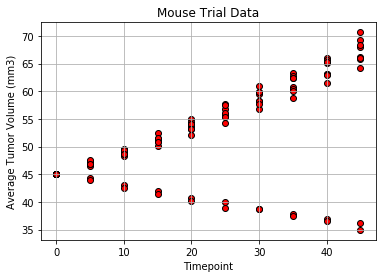

In [82]:
# Generate the Plot (with Error Bars)
plt.scatter(munged_data["Timepoint"], munged_data["Avg Tumor Volume"], marker="o", 
                                    facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("Mouse Trial Data")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.grid(True)

# Save the figure
plt.savefig("MouseTrialData.png")

# Show plot
plt.show()


In [83]:
df = pd.DataFrame(munged_data)
pivot_data = df.pivot(index='Timepoint', columns='Drug', values='Avg Tumor Volume')
pivot_data_df = pivot_data.reset_index()
#pivot_data_df.info()
pivot_data_df.head(10)


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


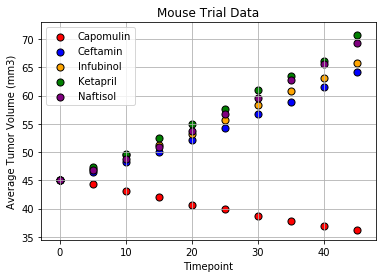

In [84]:
# Generate the Plot (with Error Bars)

plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Capomulin"], s = 50, marker="o", 
                                    facecolors="red", edgecolors="black", label = "Capomulin")
plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Ceftamin"], s = 50, marker="o", 
                                    facecolors="blue", edgecolors="black", label = "Ceftamin")
plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Infubinol"], s = 50, marker="o", 
                                    facecolors="orange", edgecolors="black", label = "Infubinol")
plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Ketapril"], s = 50, marker="o", 
                                    facecolors="green", edgecolors="black", label = "Ketapril")
plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Naftisol"], s = 50, marker="o", 
                                    facecolors="purple", edgecolors="black", label = "Naftisol")
#plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Placebo"], s = 50, marker="o", 
                                    #facecolors="gray", edgecolors="black", label = "Placebo")
#plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Propriva"], s = 50, marker="o", 
                                    #facecolors="brown", edgecolors="black", label = "Propriva")
#plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Ramicane"], s = 50, marker="o", 
                                    #facecolors="yellow", edgecolors="black", label = "Ramicane")
#plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Stelasyn"], s = 50, marker="o", 
                                    #facecolors="white", edgecolors="black", label = "Stelasyn")
#plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Zoniferol"], s = 50, marker="o", 
                                    #facecolors="magenta", edgecolors="black", label = "Zoniferol")



# Incorporate the other graph properties
plt.title("Mouse Trial Data")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.grid(True)

# Create a legend for our chart
plt.legend(loc="best")


# Save the figure
plt.savefig("MouseTrialData.png")

# Show plot
plt.show()


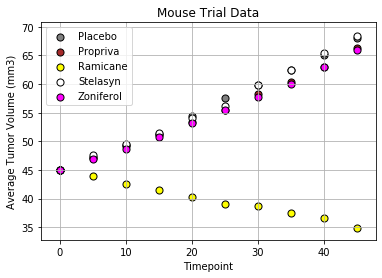

In [85]:
plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Placebo"], s = 50, marker="o", 
                                    facecolors="gray", edgecolors="black", label = "Placebo")
plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Propriva"], s = 50, marker="o", 
                                    facecolors="brown", edgecolors="black", label = "Propriva")
plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Ramicane"], s = 50, marker="o", 
                                    facecolors="yellow", edgecolors="black", label = "Ramicane")
plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Stelasyn"], s = 50, marker="o", 
                                    facecolors="white", edgecolors="black", label = "Stelasyn")
plt.scatter(pivot_data_df["Timepoint"], pivot_data_df["Zoniferol"], s = 50, marker="o", 
                                    facecolors="magenta", edgecolors="black", label = "Zoniferol")



# Incorporate the other graph properties
plt.title("Mouse Trial Data")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.grid(True)

# Create a legend for our chart
plt.legend(loc="best")


# Save the figure
plt.savefig("MouseTrialData2.png")

# Show plot
plt.show()


In [86]:
# Show the Figure
plt.show("MouseTrialData.png")

## Metastatic Response to Treatment

In [93]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

# Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
metagroup_trial = mouse_trial_df.groupby (["Drug","Timepoint"])

avg_meta_sites = metagroup_trial["Metastatic Sites"].agg(np.mean)
ste_meta_sites = metagroup_trial["Metastatic Sites"].agg(np.std)

# Convert to DataFrame
metagroup_trial_df = pd.DataFrame({"Avg Metastatic Site": avg_meta_sites,
                              "Metastatic Sites Std Error": ste_meta_sites})
# Preview DataFrame

metagroup_trial_df.info()
metagroup_trial_df.head()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, (Capomulin, 0) to (Zoniferol, 45)
Data columns (total 2 columns):
Avg Metastatic Site           100 non-null float64
Metastatic Sites Std Error    100 non-null float64
dtypes: float64(2)
memory usage: 2.0+ KB


Avg Metastatic Site  Metastatic Sites Std Error
Drug      Timepoint                                                 
Capomulin 0                     0.000000                    0.000000
          5                     0.160000                    0.374166
          10                    0.320000                    0.627163
          15                    0.375000                    0.646899
          20                    0.652174                    0.775107

In [94]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
# Minor Data Munging to Re-Format the Data Frames
munged_metasite_data = metagroup_trial_df.reset_index()
# Preview that Reformatting worked
#munged_metasite_data.info()
munged_metasite_data.head()

,Drug,Timepoint,Avg Metastatic Site,Metastatic Sites Std Error
0,Capomulin,0,0.000000,0.000000
1,Capomulin,5,0.160000,0.374166
2,Capomulin,10,0.320000,0.627163
3,Capomulin,15,0.375000,0.646899
4,Capomulin,20,0.652174,0.775107


In [95]:
df = pd.DataFrame(munged_metasite_data)
pivot_metasitedata = df.pivot(index='Timepoint', columns='Drug', 
                              values='Avg Metastatic Site')
pivot_metasitedata_df = pivot_metasitedata.reset_index()
#pivot_metasitedata_df.info()
pivot_metasitedata_df.head(10)


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


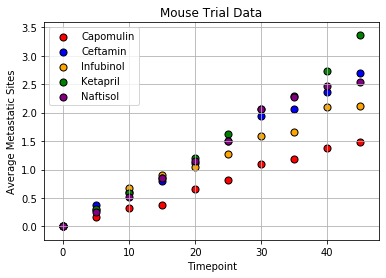

In [106]:
# Generate the Plot (with Error Bars)

plt.scatter(pivot_metasitedata_df["Timepoint"], pivot_metasitedata_df["Capomulin"], s = 50, marker="o", 
                                    facecolors="red", edgecolors="black", label = "Capomulin")
plt.scatter(pivot_metasitedata_df["Timepoint"], pivot_metasitedata_df["Ceftamin"], s = 50, marker="o", 
                                    facecolors="blue", edgecolors="black", label = "Ceftamin")
plt.scatter(pivot_metasitedata_df["Timepoint"], pivot_metasitedata_df["Infubinol"], s = 50, marker="o", 
                                    facecolors="orange", edgecolors="black", label = "Infubinol")
plt.scatter(pivot_metasitedata_df["Timepoint"], pivot_metasitedata_df["Ketapril"], s = 50, marker="o", 
                                    facecolors="green", edgecolors="black", label = "Ketapril")
plt.scatter(pivot_metasitedata_df["Timepoint"], pivot_metasitedata_df["Naftisol"], s = 50, marker="o", 
                                    facecolors="purple", edgecolors="black", label = "Naftisol")


# Incorporate the other graph properties
plt.title("Mouse Trial Data")
plt.ylabel("Average Metastatic Sites")
plt.xlabel("Timepoint")
plt.grid(True)

# Create a legend for our chart
plt.legend(loc="best")


# Save the figure
plt.savefig("MetastaticTrialData.png")

# Show plot
plt.show()


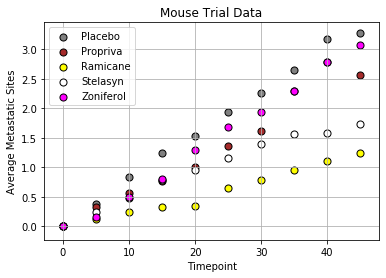

In [91]:
plt.scatter(pivot_metasitedata_df["Timepoint"], pivot_metasitedata_df["Placebo"], s = 50, marker="o", 
                                    facecolors="gray", edgecolors="black", label = "Placebo")
plt.scatter(pivot_metasitedata_df["Timepoint"], pivot_metasitedata_df["Propriva"], s = 50, marker="o", 
                                    facecolors="brown", edgecolors="black", label = "Propriva")
plt.scatter(pivot_metasitedata_df["Timepoint"], pivot_metasitedata_df["Ramicane"], s = 50, marker="o", 
                                    facecolors="yellow", edgecolors="black", label = "Ramicane")
plt.scatter(pivot_metasitedata_df["Timepoint"], pivot_metasitedata_df["Stelasyn"], s = 50, marker="o", 
                                    facecolors="white", edgecolors="black", label = "Stelasyn")
plt.scatter(pivot_metasitedata_df["Timepoint"], pivot_metasitedata_df["Zoniferol"], s = 50, marker="o", 
                                    facecolors="magenta", edgecolors="black", label = "Zoniferol")



# Incorporate the other graph properties
plt.title("Mouse Trial Data")
plt.ylabel("Average Metastatic Sites")
plt.xlabel("Timepoint")
plt.grid(True)

# Create a legend for our chart
plt.legend(loc="best")


# Save the figure
plt.savefig("MetastaticTrialData2.png")

# Show plot
plt.show()


## Survival Rates

In [102]:
# Display the data table for preview
mouse_trial_df.info()
mouse_trial_df.head()

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mousecount_trial = mouse_trial_df.groupby (["Drug","Timepoint"])

mouse_cnt = mousecount_trial["Mouse ID"].count()

#avg_tumor_vol
# Convert to DataFrame
mousecount_trial_df = pd.DataFrame({"Mouse Count": mouse_cnt})
# Preview DataFrame

mousecount_trial_df.info()
mousecount_trial_df
# Convert to DataFrame

# Preview DataFrame


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Drug                  1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, (Capomulin, 0) to (Zoniferol, 45)
Data columns (total 1 columns):
Mouse Count    100 non-null int64
dtypes: int64(1)
memory usage: 1.3+ KB


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18
          25                  18
          30                  16
          35                  14
          40                  14
          45                  13
Infubinol 0                   25
          5                   25
          10                  21
          15                  21
          20                  20
          25                  18
          30                  17
          35                  12
          40                  10
          45                   9
...                          ...
Ramicane  0                   25
          5                   25
          10                  24
          15                  24
          20                  23
          25                  23
          30                  23
          35                  21
          40                  20
          45                  20
Stelasyn  0                   26
          5                   25
          10                  23
          15                  23
          20                  21
          25                  19
          30                  18
          35                  16
          40                  12
          45                  11
Zoniferol 0                   25
          5                   24
          10                  22
          15                  21
          20                  17
          25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [104]:
# Minor Data Munging to Re-Format the Data Frames
munged_mousecount_data = mousecount_trial_df.reset_index()
# Preview that Reformatting worked
#munged_metasite_data.info()
munged_mousecount_data.head()
# Preview the Data Frame
df = pd.DataFrame(munged_mousecount_data)
pivot_mousecount = df.pivot(index='Timepoint', columns='Drug', 
                              values='Mouse Count')
pivot_mousecount_df = pivot_mousecount.reset_index()
#pivot_metasitedata_df.info()
pivot_mousecount_df.head(10)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


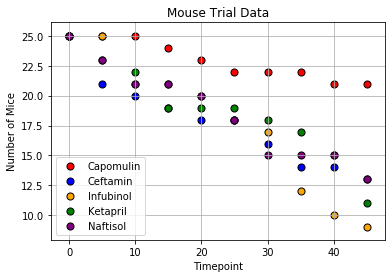

In [108]:
# Generate the Plot (with Error Bars)

plt.scatter(pivot_mousecount_df["Timepoint"], pivot_mousecount_df["Capomulin"], s = 50, marker="o", 
                                    facecolors="red", edgecolors="black", label = "Capomulin")
plt.scatter(pivot_mousecount_df["Timepoint"], pivot_mousecount_df["Ceftamin"], s = 50, marker="o", 
                                    facecolors="blue", edgecolors="black", label = "Ceftamin")
plt.scatter(pivot_mousecount_df["Timepoint"], pivot_mousecount_df["Infubinol"], s = 50, marker="o", 
                                    facecolors="orange", edgecolors="black", label = "Infubinol")
plt.scatter(pivot_mousecount_df["Timepoint"], pivot_mousecount_df["Ketapril"], s = 50, marker="o", 
                                    facecolors="green", edgecolors="black", label = "Ketapril")
plt.scatter(pivot_mousecount_df["Timepoint"], pivot_mousecount_df["Naftisol"], s = 50, marker="o", 
                                    facecolors="purple", edgecolors="black", label = "Naftisol")


# Incorporate the other graph properties
plt.title("Mouse Trial Data")
plt.ylabel("Number of Mice")
plt.xlabel("Timepoint")
plt.grid(True)

# Create a legend for our chart
plt.legend(loc="best")


# Save the figure
plt.savefig("MouseCountTrialData.png")

# Show plot
plt.show()


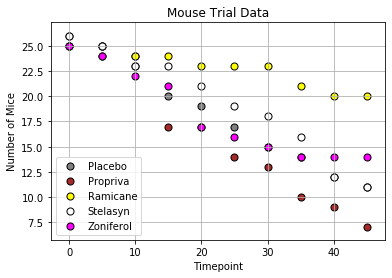

In [109]:
plt.scatter(pivot_mousecount_df["Timepoint"], pivot_mousecount_df["Placebo"], s = 50, marker="o", 
                                    facecolors="gray", edgecolors="black", label = "Placebo")
plt.scatter(pivot_mousecount_df["Timepoint"], pivot_mousecount_df["Propriva"], s = 50, marker="o", 
                                    facecolors="brown", edgecolors="black", label = "Propriva")
plt.scatter(pivot_mousecount_df["Timepoint"], pivot_mousecount_df["Ramicane"], s = 50, marker="o", 
                                    facecolors="yellow", edgecolors="black", label = "Ramicane")
plt.scatter(pivot_mousecount_df["Timepoint"], pivot_mousecount_df["Stelasyn"], s = 50, marker="o", 
                                    facecolors="white", edgecolors="black", label = "Stelasyn")
plt.scatter(pivot_mousecount_df["Timepoint"], pivot_mousecount_df["Zoniferol"], s = 50, marker="o", 
                                    facecolors="magenta", edgecolors="black", label = "Zoniferol")



# Incorporate the other graph properties
plt.title("Mouse Trial Data")
plt.ylabel("Number of Mice")
plt.xlabel("Timepoint")
plt.grid(True)

# Create a legend for our chart
plt.legend(loc="best")


# Save the figure
plt.savefig("MetastaticTrialData2.png")

# Show plot
plt.show()


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)